In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df_1 = pd.read_csv(r'D:\Code\AAA_github\KHDL_IT4930\dataset\train.csv', sep='\t', index_col=0)
df_2 = pd.read_csv(r'D:\Code\AAA_github\KHDL_IT4930\dataset\val.csv', sep='\t', index_col=0)
df_train = pd.concat([df_1, df_2], axis=0)
df_test = pd.read_csv(r'D:\Code\AAA_github\KHDL_IT4930\dataset\test.csv', sep='\t', index_col=0)

In [3]:
df_full = pd.concat([df_train, df_test], axis=0)
df_full
df_full = pd.get_dummies(df_full, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])

In [4]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
df = norm.fit_transform(df_full)

df = pd.DataFrame(df, columns=df_full.columns)

In [5]:
# get X_train from df_train index in df
X_train = df.loc[df_train.index]
X_test = df.loc[df_test.index]
y_train = X_train['gia']
y_test = X_test['gia']
X_train = X_train.drop(['gia'], axis=1)
X_test = X_test.drop(['gia'], axis=1)



Linear Regression


In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_hat = linear_model.predict(X_test)
error_score = metrics.r2_score(y_test, y_hat)
print("R squared Error : ", error_score)

R squared Error :  0.7683689051716005


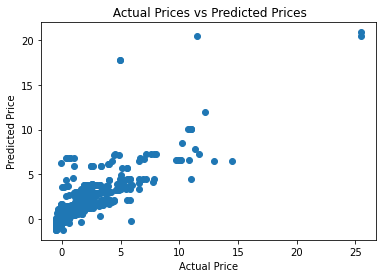

In [8]:
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

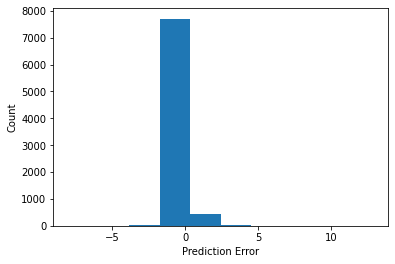

In [9]:
error = y_hat - y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

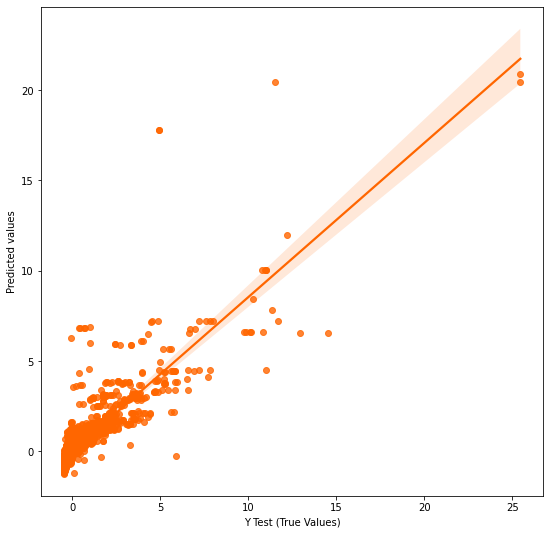

In [10]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x =y_test,y = y_hat, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [11]:
metrics.mean_squared_error(y_test, y_hat)

0.22086830361705792

In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [13]:
parametrs = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 20, 100],
    'min_samples_leaf': [2, 5, 10]
}

In [14]:
grid_search_reg = GridSearchCV(RandomForestRegressor(), parametrs, scoring = 'neg_mean_squared_error', cv=5, n_jobs=-1)

In [15]:
grid_search_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10, 20, 100],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [16]:
grid_search_reg.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [17]:
y_hat = grid_search_reg.best_estimator_.predict(X_test)

In [18]:
metrics.r2_score(y_test, y_hat)

0.9379433322476636

In [19]:
metrics.mean_squared_error(y_test, y_hat)

0.059173190649295444